In [1]:
cd /Users/jz-rolling/PycharmProjects/CleanSpace/momia2

/Users/jz-rolling/PycharmProjects/CleanSpace/momia2


In [191]:
import momia2 as mo
import numpy as np
from matplotlib import pyplot as plt
from skimage import exposure,filters
from microfilm.microplot import microshow
from matplotlib.patches import Rectangle

In [216]:
loader = mo.ImageLoader('/Volumes/Extreme_SSD/20230527_BMDM_rRNA_prpCD/Ng2g_H2O2+_006.nd2')

In [217]:
# perform rolling ball substraction then z_max

data_dict = {}
for i in range(loader.n_zpositions):
    slice_data = loader.get_slice_all_channels(zplane=i)
    for c in ['TRITC','DAPI']:
        slice_data[c+'bg_subtracted'] = mo.utils.corrections.rolling_ball_bg_subtraction(slice_data[c])
    data_dict[i] = slice_data

In [219]:
z_max_TRITC = np.array([v['TRITCbg_subtracted'] for k,v in data_dict.items()]).max(axis=0)
z_max_DAPI = np.array([v['DAPI'] for k,v in data_dict.items()]).max(axis=0)
phase = data_dict[5]['Ph 20-40']
images = [exposure.adjust_gamma(z_max_TRITC,0.8),z_max_DAPI,
          exposure.adjust_gamma(phase,0.3)]

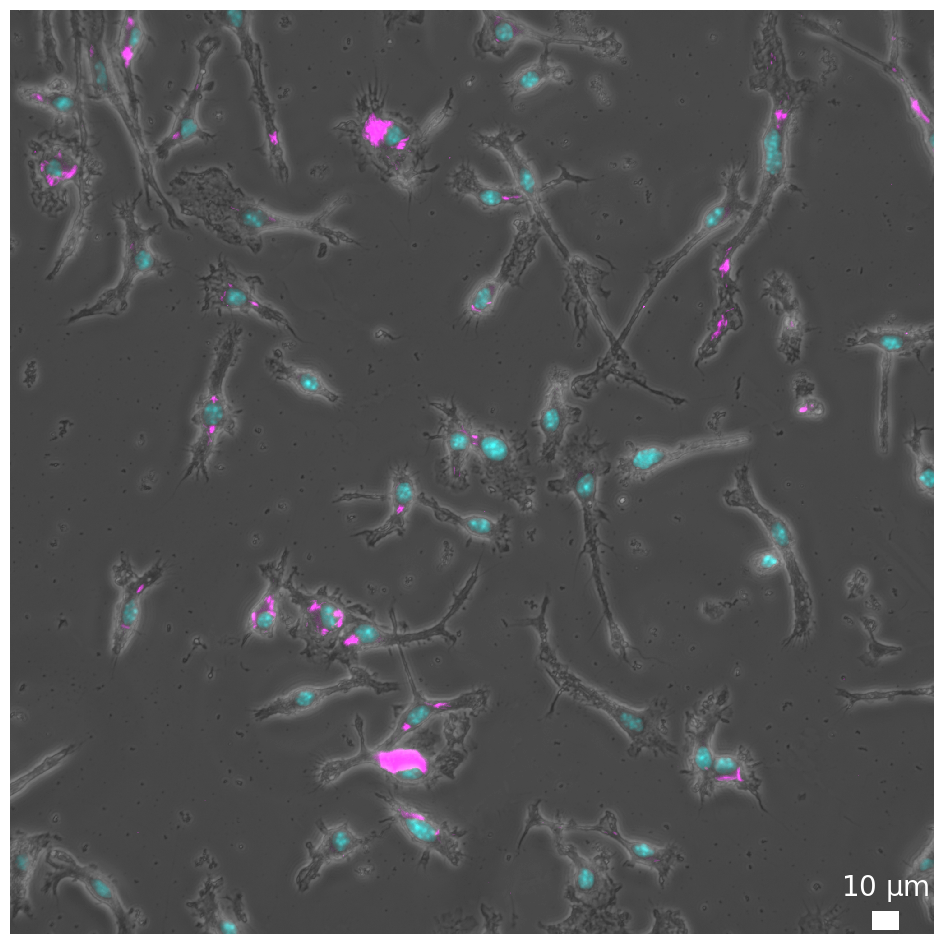

In [226]:
fig=plt.figure(figsize=(12,12))
ax = fig.add_subplot()
microim = microshow(
    images=images,#[x[730:1330,830:1430] for x in images], 
    ax=ax,
    limits = [[100,3000],[500,15000],[2000,100000]],
    cmaps=['pure_magenta','pure_cyan','gist_gray'],
    unit='µm', 
    scalebar_size_in_units=10, 
    scalebar_unit_per_pix=loader.pixel_microns, 
    scalebar_font_size=20,
    label_text='A', 
    label_font_size=0.02)
#ax.add_patch(Rectangle([830,730],width=600,height=600,ec='w',lw=3,fill=False))
plt.savefig('/Users/jz-rolling/Desktop/labnotes_transferred/FISH/manuscript/data_clips/20230527_g2g_16srRNA_40X.tif',dpi=160,bbox_inches='tight')

In [158]:
z_max_TRITC.max()

10769

In [117]:
loader.pixel_microns

0.1625

In [76]:
microfilm.colorify()

TypeError: 'module' object is not callable